## **Setup and Imports**




In [1]:
# Import necessary libraries
import pickle
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (7,4)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## **Mount Google Drive and Load Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
os.chdir('/content/drive/My Drive/Colab Notebooks')

from google.colab import files
# files.upload()

[f for f in os.listdir() if 'coin' in f.lower()] # Just to check you have coins.csv and noisy_coins.csv in the right location!

['coins.csv', 'noisy_coins.csv']

## **Dataset Visualization**

In [ ]:
# Load the dataset 'coins.csv' using pandas' read_csv function.
# Make sure coins.csv is in the directory where you're using Jupyter
# If using Google Colab, upload the coins file to the directory by usinf upload in the toolbar on the left
coins = pd.read_csv('coins.csv')
noisy_coins = pd.read_csv('noisy_coins.csv')
coins.tail(5)

,reflectance,weight,denomination
174,26.650728,5.420213,2
175,27.492055,6.149025,2
176,29.157397,7.035390,2
177,27.741846,5.032280,2
178,27.629866,5.395878,2


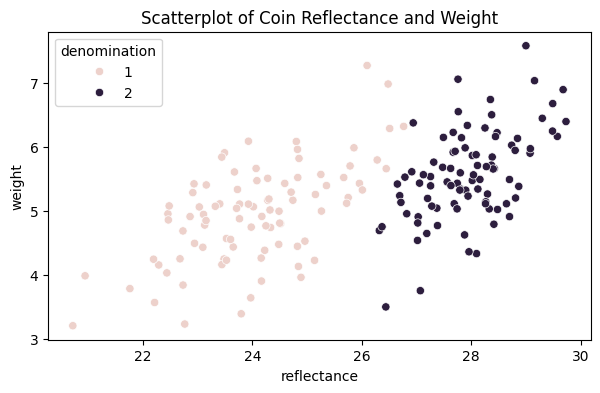

In [ ]:
# Visualize the data distribution using a scatterplot
sns.scatterplot(x="reflectance", y="weight", data=coins, hue="denomination")
plt.title("Scatterplot of Coin Reflectance and Weight")
plt.show()

## **Data Preparation**

In [ ]:
# [STUDENT SECTION: Prepare the data for training and testing]

# Prepare the input features (X)
X = coins[["reflectance", "weight"]].to_numpy()

# Convert the denomination values (1 and 2) to binary labels (0 and 1) for binary classification.
# Hint: Subtract 1 from the denomination values to convert them to 0 and 1.
y = coins["denomination"].to_numpy() - 1


# Split the data into training and testing sets using train_test_split.
# Use an 80/20 split for training and testing and random_state of 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Set the arguments
# print(X_train)
# print(y_train)
# Normalize the input test and train features using StandardScaler to standardize reflectance and weight values.
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Use the scaler's fit_transform and transform methods to standardize the training and testing features.
# training data = fit_transform, test data = transform

#  (See https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe)



## **Build and Train the Model**

In [ ]:
# [STUDENT SECTION: Define and compile the model]
# Instantiate and Train the Model
# - Build a neural network model using TensorFlow/Keras.
# - The model should have:
#    - An input layer with 2 input features (reflectance and weight).
#    - 1 or 2 hidden layers with the number of neurons at your discretion (use 'relu' activation).
#      (Experiment to find the best accuracy)
#    - An output layer with 1 neuron and 'sigmoid' activation for binary classification.

model = Sequential([
    Input(shape=(2,)),  # Input layer with 2 features
    Dense(2, activation='relu'), # Example: First hidden layer with 2 neurons
    Dense(2, activation='relu'),  # Example: Second hidden layer with 2 neurons (you can add or remove this line)
    Dense(1, activation='sigmoid') # Output layer with 1 neuron and sigmoid activation
])

# - Compile the model using Adam optimizer with a learning rate of 0.001,
#   binary_crossentropy as the loss function, and 'accuracy' as the metric.
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


# - Train the model using X_train and y_train.
#    - Set validation_split to 0.2.
#    - Use EarlyStopping with patience=5 to prevent overfitting.
#    - Train the model for 100 epochs and use a batch size of 32.
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# call the appropriate function to train the model
trained_model = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8517 - loss: 0.5953 - val_accuracy: 0.7931 - val_loss: 0.5925
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8173 - loss: 0.6040 - val_accuracy: 0.7931 - val_loss: 0.5891
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8350 - loss: 0.5991 - val_accuracy: 0.7931 - val_loss: 0.5858
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8388 - loss: 0.5847 - val_accuracy: 0.7931 - val_loss: 0.5825
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7826 - loss: 0.5961 - val_accuracy: 0.7931 - val_loss: 0.5793
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7815 - loss: 0.6002 - val_accuracy: 0.8276 - val_loss: 0.5760
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8331 - loss: 0.5863 - val_accuracy: 0.7931 - val_loss: 0.5728
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8664 - loss: 0.5741 - val_accuracy: 0.8276 - val_loss:

## **Evaluate the Model**

**experiement with the accuracy if used only 1 middle layer vs. 2 and so on**

In [ ]:
# [STUDENT SECTION: Evaluate the model]
# Hint:
# - Call model.evaluate() on the test set (X_test, y_test) and print the test accuracy.
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Model with {len(model.layers) - 2} hidden layer(s):") # Subtract input and output layers
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.2813
Model with 1 hidden layer(s):
Loss: 0.28467845916748047
Accuracy: 1.0


Plotting range: Reflectance (-2.35, 2.59), Weight (-2.33, 3.21)
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


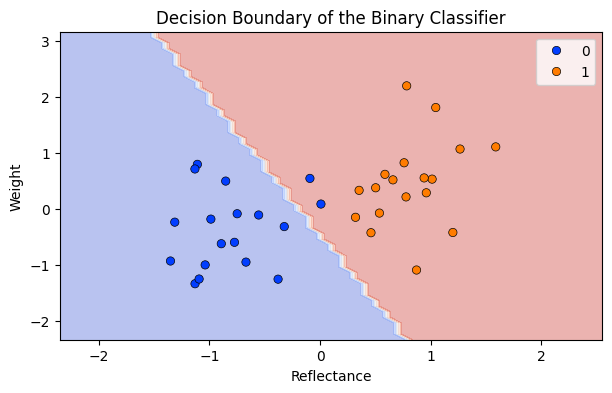

In [ ]:
# Plot the Decision Boundary:
# - Define a function to plot the decision boundary of the trained model. This function should take in the feature matrix X, the labels y, and the trained model.
# - This function should:
#    - Generate a mesh grid over the feature space (reflectance and weight).
#    - Use the model to predict labels for each point in the mesh grid.
#    - Plot the decision boundary using contourf.
#    - Overlay the training data points using seaborn's scatterplot.
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    print(f"Plotting range: Reflectance ({x_min:.2f}, {x_max:.2f}), Weight ({y_min:.2f}, {y_max:.2f})") # Add print statement
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.round(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.flatten(), palette='bright', edgecolor="k")
    plt.xlabel('Reflectance')
    plt.ylabel('Weight')
    plt.title('Decision Boundary of the Binary Classifier')
    plt.show()


# [STUDENT SECTION: Call the function to plot the decision boundary by passing the correct arguments]
plot_decision_boundary(X_test_scaled, y_test, model)

In [ ]:
# Save the Trained Model:
# - Save the trained model to a file named 'model.h5' using model.save().

# [STUDENT SECTION: Save the model]
model.save('model.h5')
# Load the Saved Model and Use it to evalue the "test" data:
# - Load the model using keras.models.load_model and re-evaluate it on the test data.
tf.keras.models.load_model('model.h5')

<Sequential name=sequential_11, built=True>

In [ ]:
# [STUDENT SECTION: Evaluate the loaded model on the test data]
# the accuracy of the loaded model on the test data.  Examine the output
# of predict and think about how to compute the accuracy of the predictions using
# the y_test data.  Hint:  You may need to round the predictions to 0 or 1 using np.round()
# When you use model.predict() in a binary classification problem, the output is usually
# a 2D array where each element is a list containing a single predicted probability
# (e.g., [[0.1], [0.9], [0.3], ...]). To compare these predictions to your 1D y_test array
# (e.g., [0, 1, 0, ...]), you need to "flatten()" the 2D array into a 1D array.

# Predict on the test data
test_predictions = model.predict(X_test_scaled)
# Convert predictions to binary labels (0 or 1)
test_predictions_binary = np.round(test_predictions).flatten()
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Loss is {loss}")
print(f"Accuracy is {accuracy}")

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

accuracy_noisy = accuracy_score(y_test, test_predictions_binary)


print(f"Accuracy on noisy data: {accuracy_noisy}")



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 1.0000 - loss: 0.2813
Loss is 0.28467845916748047
Accuracy is 1.0
Accuracy on noisy data: 1.0


### **Eval on noisy data**

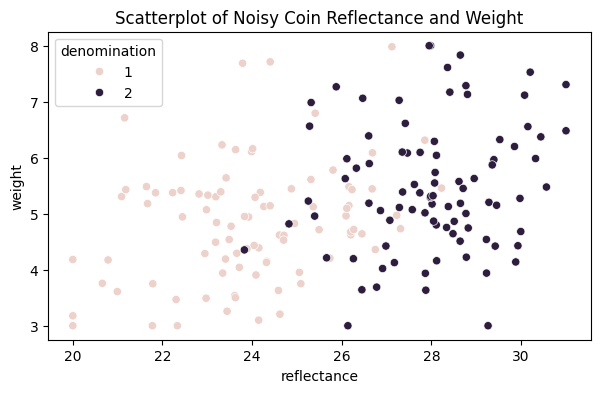

In [ ]:

# In this section, you’ll test how well your trained model performs when the data isn't perfectly clean.
#  - The goal is to see whether your model can still correctly classify coins when there’s noise (for example, small measurement errors or variations in reflectance/weight).

# Visualize the data distribution using a scatterplot
noisy_coins = pd.read_csv('noisy_coins.csv')

sns.scatterplot(x="reflectance", y="weight", data=noisy_coins, hue="denomination")
plt.title("Scatterplot of Noisy Coin Reflectance and Weight")
plt.show()



In [ ]:
#Prepare features and labels
# - Extract the same features as before: reflectance and weight.
# - Convert the denomination column (1/2) into binary labels (0/1).
# - IMPORTANT: Use the SAME StandardScaler (scaler) that you used for training.
#   This ensures both datasets are normalized in the same way.

#Predict and evaluate
# - The model will output probabilities between 0 and 1.
# - Convert these probabilities into binary predictions using a threshold of 0.5.

X_noisy = noisy_coins[["reflectance", "weight"]].to_numpy()
y_noisy = noisy_coins["denomination"].to_numpy() - 1

# Scale the noisy data using the *same* scaler fitted on the training data
X_noisy_scaled = scaler.transform(X_noisy)

# Predict on the noisy data
predictions_noisy = model.predict(X_noisy_scaled)

# Convert predictions to binary labels
predictions_noisy_binary = np.round(predictions_noisy).flatten()

# Evaluate the model on noisy data
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

accuracy_noisy = accuracy_score(y_noisy, predictions_noisy_binary)
conf_matrix_noisy = confusion_matrix(y_noisy, predictions_noisy_binary)
precision_noisy = precision_score(y_noisy, predictions_noisy_binary)
recall_noisy = recall_score(y_noisy, predictions_noisy_binary)
f1_noisy = f1_score(y_noisy, predictions_noisy_binary)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


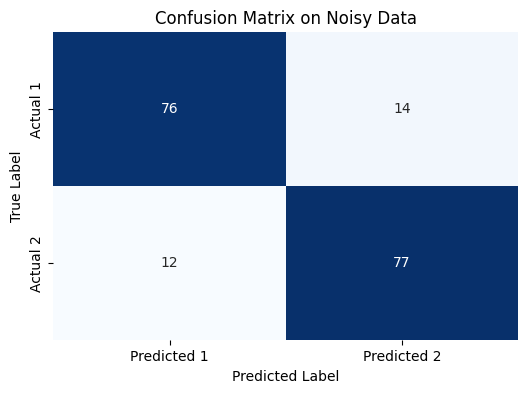

Accuracy on noisy data: 0.8547

Precision on noisy data: 0.8462
Recall on noisy data: 0.8652
F1-score on noisy data: 0.8556


In [ ]:
# Generate and visualize confusion matrix
# - Add the needed libraries
# - The confusion matrix shows how many samples were correctly or incorrectly classified.
# - Rows correspond to TRUE labels; columns correspond to PREDICTED labels.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix (already done in a previous cell, but recalculating for visualization)
conf_matrix_noisy = confusion_matrix(y_noisy, predictions_noisy_binary)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_noisy, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 2'], yticklabels=['Actual 1', 'Actual 2'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Noisy Data')
plt.show()

# Print precision, recall, and F1-score (already done in a previous cell)
print(f"Accuracy on noisy data: {accuracy_noisy:.4f}")
print(f"\nPrecision on noisy data: {precision_noisy:.4f}")
print(f"Recall on noisy data: {recall_noisy:.4f}")
print(f"F1-score on noisy data: {f1_noisy:.4f}")